The data we'll read comes from https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

We'll read data from the "Electronics" category, which is fairly small. The raw data is here, and should be downloaded to your local machine: https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz

In [23]:
path = "E:\\CapstoneProject\\amazon_reviews_us_Electronics_v1_00.tsv.gz"

Note that the data is gzipped (filetype .gz). Rather than unzipping it, we can use the "gzip" library to read zipped data directly from the file.

In [2]:
import gzip

Using this library, we can open the data as if it were a regular file. "rt" converts from bytes to strings:

In [3]:
f = gzip.open(path, 'rt', encoding="utf8")

Let's look at one line of the file:

In [4]:
header = f.readline()

In [5]:
header

'marketplace\tcustomer_id\treview_id\tproduct_id\tproduct_parent\tproduct_title\tproduct_category\tstar_rating\thelpful_votes\ttotal_votes\tvine\tverified_purchase\treview_headline\treview_body\treview_date\n'

This line is called the "header." Note that it contains the names of the fields we expect to find in the file. These fields are separeted by tabs (\t) in a tsv file.

We can extract these fields to a list using the "split()" function, which separates the string on the tab character:

In [6]:
header = header.strip().split('\t')

In [7]:
header

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

We can now do the same thing to extract every line from the file, using a "for" loop:

In [8]:
lines = []

In [9]:
for line in f:
    fields = line.split('\t')
    lines.append(fields)

Let's look at the first line:

In [10]:
lines[0]

['US',
 '41409413',
 'R2MTG1GCZLR2DK',
 'B00428R89M',
 '112201306',
 'yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable',
 'Electronics',
 '5',
 '0',
 '0',
 'N',
 'Y',
 'Five Stars',
 'As described.',
 '2015-08-31\n']

It's hard to keep track of what each field means, but note that each entry corresponds to one field from the header. Using the "zip" function, we can match the header columns to the corresponding columns of the data:

In [11]:
z = zip(header, lines[0])
list(z)

[('marketplace', 'US'),
 ('customer_id', '41409413'),
 ('review_id', 'R2MTG1GCZLR2DK'),
 ('product_id', 'B00428R89M'),
 ('product_parent', '112201306'),
 ('product_title',
  'yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable'),
 ('product_category', 'Electronics'),
 ('star_rating', '5'),
 ('helpful_votes', '0'),
 ('total_votes', '0'),
 ('vine', 'N'),
 ('verified_purchase', 'Y'),
 ('review_headline', 'Five Stars'),
 ('review_body', 'As described.'),
 ('review_date', '2015-08-31\n')]

Note that this data is now essentially what is known as a "Key Value" pair, where the first entry is the key, and the second is the value

Python has a special data structure for dealing with key value pairs known as a "dictionary". This allows us to index the data using the keys directly. Let's convert this data to a dictionary:

In [12]:
d = dict(zip(header, lines[0]))
d

{'marketplace': 'US',
 'customer_id': '41409413',
 'review_id': 'R2MTG1GCZLR2DK',
 'product_id': 'B00428R89M',
 'product_parent': '112201306',
 'product_title': 'yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable',
 'product_category': 'Electronics',
 'star_rating': '5',
 'helpful_votes': '0',
 'total_votes': '0',
 'vine': 'N',
 'verified_purchase': 'Y',
 'review_headline': 'Five Stars',
 'review_body': 'As described.',
 'review_date': '2015-08-31\n'}

Now we can directly query any of the fields:

In [13]:
d['customer_id']

'41409413'

In [14]:
d['star_rating']

'5'

It might be useful to convert a few of the numerical fields from strings to integers:

In [15]:
d['star_rating'] = int(d['star_rating'])
d['helpful_votes'] = int(d['helpful_votes'])
d['total_votes'] = int(d['total_votes'])

Finally, let's do the same thing for every line in the file, to build our dataset

In [16]:
dataset = []

In [17]:
for line in lines:
    # Convert to key-value pairs
    d = dict(zip(header, line))
    # Convert strings to integers for some fields:
    d['star_rating'] = int(d['star_rating'])
    d['helpful_votes'] = int(d['helpful_votes'])
    d['total_votes'] = int(d['total_votes'])
    dataset.append(d)

Now, we can easily perform queries on any entry in our dataset:

In [18]:
dataset[50]['star_rating']

3

# Computing simple statistics from data

Let's quickly read the data again using the same code:

In [104]:
import gzip
path = "E:\\CapstoneProject\\amazon_reviews_us_Electronics_v1_00.tsv.gz"
f = gzip.open(path, 'rt', encoding='utf8')

In [105]:
dataset = []
# Read the header:
header = f.readline().strip().split('\t')
for line in f:
    # Separate by tabs
    line = line.split('\t')
    # Convert to key-value pairs
    d = dict(zip(header, line))
    # Convert strings to integers for some fields:
    d['star_rating'] = int(d['star_rating'])
    d['helpful_votes'] = int(d['helpful_votes'])
    d['total_votes'] = int(d['total_votes'])
    dataset.append(d)

By iterating through our dataset, we can straightforwardly compute some simple statistics, e.g. how many ratings are there?

In [106]:
nRatings = len(dataset)
nRatings

3093869

And what is the average rating?

In [107]:
average = 0
for d in dataset:
    average += d['star_rating']
average /= nRatings
average

4.035506997872243

How many unique users and products are there in this dataset?

In [108]:
users = set()
items = set()
for d in dataset:
    users.add(d['customer_id'])
    items.add(d['product_id'])

len(users),len(items)

(2154357, 185852)

E.g. What is the average rating of a verified purchase, versus an unverified purchase?

In [109]:
avVerified = 0
avUnverified = 0
nVerified = 0
nUnverified = 0
for d in dataset:
    if d['verified_purchase'] == 'Y':
        avVerified += d['star_rating']
        nVerified += 1
    else:
        avUnverified += d['star_rating']
        nUnverified += 1

avVerified /= nVerified
avUnverified /= nUnverified
avVerified, avUnverified

(4.090108567319045, 3.7478947165843866)

Many of these types of operations can be done more easily using operations known as "list comprehensions", which allow us to process and filter the data:

In [110]:
verifiedRatings = [d['star_rating'] for d in dataset if d['verified_purchase'] == 'Y']
unverifiedRatings = [d['star_rating'] for d in dataset if d['verified_purchase'] == 'N']

In [111]:
print(sum(verifiedRatings) * 1.0 / len(verifiedRatings))
print(sum(unverifiedRatings) * 1.0 / len(unverifiedRatings))

4.090108567319045
3.7478947165843866


# Reading data from JSON

Another common data format is JSON (https://www.json.org/). This format generalizes key-value pairs (like those that we saw in the previous notebooks), by allowing the values to also be key value pairs (allowing for hierarchical data).

Let's look at an example of such data, this time from Yelp. This data is part of the "Yelp dataset challenge" and should first be downloaded locally before beginning this notebook: https://www.yelp.com/dataset/download

In [64]:
path = "E:\\CapstoneProject\\yelp_dataset\\yelp_dataset~\\yelp_academic_dataset_review.json"

This file is very large -- for the moment let's just look at the first 50,000 lines

In [69]:
f = open(path, 'r', encoding='utf8', errors='ignore')

In [70]:
lines = []
for i in range(50000):
    lines.append(f.readline())

Let's just look at the first line:

In [71]:
lines[0]

'{"review_id":"xQY8N_XvtGbearJ5X4QryQ","user_id":"OwjRMXRC0KyPrIlcjaXeFQ","business_id":"-MhfebM0QIsKt87iDN-FNw","stars":2.0,"useful":5,"funny":0,"cool":0,"text":"As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\\n\\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call \\"cozy\\" or \\"charming\\" - basically any euphemism for small.\\n\\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\\n\\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\\n* it\'s not kid friendly at all. Seriously, don\'t bring them.\\n* t

In [72]:
d = eval(lines[0])
d

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

In [73]:
d['user_id']

'OwjRMXRC0KyPrIlcjaXeFQ'

In [74]:
d['stars']

2.0

The "eval" operator isn't the safest though -- it's basically executing the line of the file as if it were native python code. This is a dangerous thing to do, especially if we don't trust the source of the file we're using.

More safely, we can use the json library to read the data.

In [75]:
import json

and then read the data in the same way:

In [76]:
d = json.loads(lines[0])
d

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

# Time and date data

In [77]:
import json
path = "E:\\CapstoneProject\\yelp_dataset\\yelp_dataset~\\yelp_academic_dataset_review.json"
f = open(path, 'r', encoding='utf8', errors='ignore')

In [78]:
dataset = []
for i in range(50000):
    dataset.append(json.loads(f.readline()))

In [79]:
dataset[0]

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

Let's look at the first review's date:

In [80]:
timeString = dataset[0]['date']
print(timeString)

2015-04-15 05:21:16


To handle the string-formatted time data, we can use python's "time" library:

In [81]:
import time

In [83]:
datasetWithTimeValues = []

In [87]:
for d in dataset:
    d['date']
    d['timeStruct'] = time.strptime(d['date'], "%Y-%m-%d %H:%M:%S")
    d['timeInt'] = time.mktime(d['timeStruct'])
    datasetWithTimeValues.append(d)

# Using pandas for Data Analysis



#### Case Study: Amazon Dataset

We'll again use the the "Electronics" dataset. Please unzip the file after downloading it and place amazon_reviews_us_Electronics_v1_00.tsv.gz under the datasets.

Objective: We seek to draw inferences from this dataset, whilst exploring some of the functionalities pandas has to offer.

In [44]:
import pandas as pd
electronics = pd.read_csv('E:\\CapstoneProject\\amazon_reviews_us_Electronics_v1_00.tsv\\amazon_reviews_us_Electronics_v1_00.tsv', error_bad_lines=False,sep='\t')
print(type(electronics))
electronics.head()

b'Skipping line 9076: expected 15 fields, saw 22\nSkipping line 19256: expected 15 fields, saw 22\nSkipping line 24313: expected 15 fields, saw 22\nSkipping line 47211: expected 15 fields, saw 22\nSkipping line 54295: expected 15 fields, saw 22\nSkipping line 56641: expected 15 fields, saw 22\nSkipping line 63067: expected 15 fields, saw 22\n'
b'Skipping line 93796: expected 15 fields, saw 22\n'
b'Skipping line 132806: expected 15 fields, saw 22\nSkipping line 164631: expected 15 fields, saw 22\nSkipping line 167019: expected 15 fields, saw 22\nSkipping line 167212: expected 15 fields, saw 22\n'
b'Skipping line 198103: expected 15 fields, saw 22\nSkipping line 199191: expected 15 fields, saw 22\nSkipping line 202841: expected 15 fields, saw 22\nSkipping line 218228: expected 15 fields, saw 22\nSkipping line 235900: expected 15 fields, saw 22\n'
b'Skipping line 277761: expected 15 fields, saw 22\nSkipping line 304582: expected 15 fields, saw 22\nSkipping line 312029: expected 15 fields,

<class 'pandas.core.frame.DataFrame'>


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [45]:
electronics.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,3.091024e+06,3.091024e+06,3.091024e+06,3.091024e+06,3.091024e+06
mean,2.879196e+07,5.102057e+08,4.035415e+00,1.860874e+00,2.372440e+00
std,1.542984e+07,2.868327e+08,1.387460e+00,2.133715e+01,2.249700e+01
min,1.000500e+04,6.478000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.503881e+07,2.623618e+08,3.000000e+00,0.000000e+00,0.000000e+00
50%,2.806679e+07,5.085523e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.328128e+07,7.632433e+08,5.000000e+00,1.000000e+00,1.000000e+00
max,5.309658e+07,9.999982e+08,5.000000e+00,1.278600e+04,1.294400e+04


In [46]:
electronics['star_rating'].max()

5

In [47]:
electronics['star_rating'].min()

1

In [48]:
electronics['star_rating'].mean()

4.035415124567134

In [49]:
electronics.isnull().any()

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title         True
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline       True
review_body           True
review_date           True
dtype: bool

In [50]:
electronics.shape

(3091024, 15)

In [51]:
electronics = electronics.dropna()

In [52]:
electronics.shape

(3090877, 15)

In [53]:
df = electronics[['star_rating','helpful_votes','total_votes']]
df

,star_rating,helpful_votes,total_votes
0,5,0,0
1,5,0,0
2,5,1,1
3,1,0,0
4,5,1,1
...,...,...,...
3091019,5,0,0
3091020,5,0,0
3091021,5,5,5
3091022,5,3,3


<AxesSubplot:>

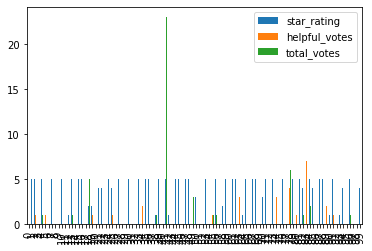

In [54]:
df.head(100).plot.bar()

<AxesSubplot:ylabel='Frequency'>

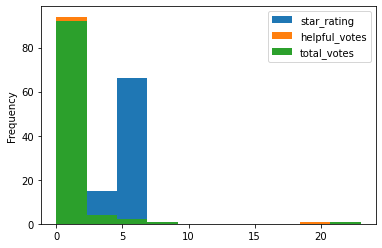

In [55]:
df.head(100).plot.hist()

<AxesSubplot:>

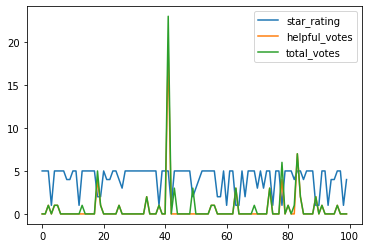

In [56]:
df.head(100).plot()

In [57]:
df_helpful_votes = df[df['helpful_votes'] > 0]
print(df.shape)
print(df_helpful_votes.shape)

(3090877, 3)
(1002062, 3)


In [58]:
df_helpful_votes
df_helpful_votes.groupby('total_votes').mean()

,star_rating,helpful_votes
total_votes,,
1,4.102596,1.000000
2,3.801982,1.569957
3,3.647487,2.290185
4,3.551811,3.031915
5,3.487170,3.779832
...,...,...
5546,1.000000,5417.000000
6353,5.000000,6012.000000
8680,5.000000,8421.000000


<AxesSubplot:>

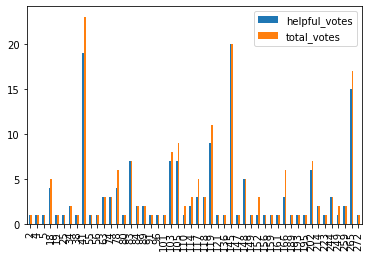

In [59]:
df_helpful_votes[['helpful_votes','total_votes']].head(50).plot.bar()

array([[<AxesSubplot:title={'center':'star_rating'}>]], dtype=object)

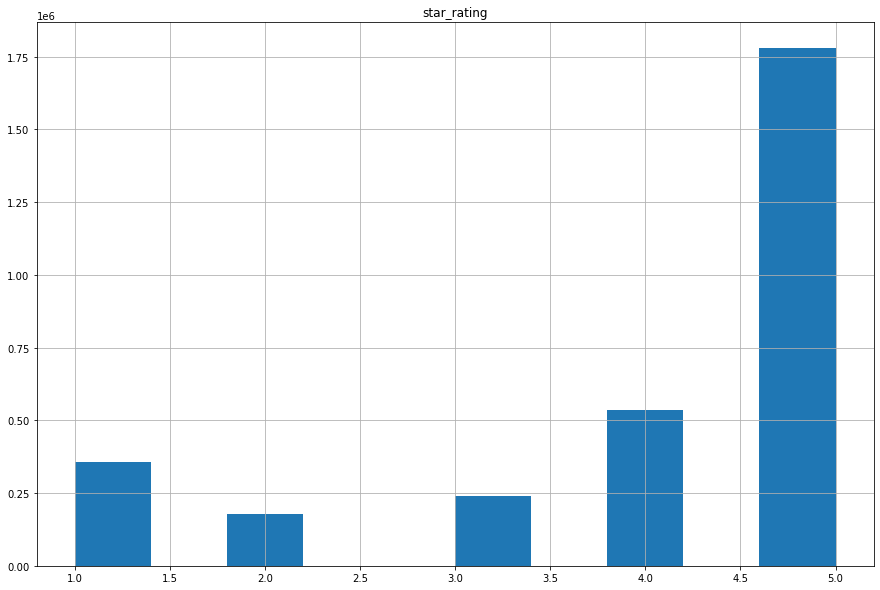

In [60]:
%matplotlib inline
electronics.hist(column='star_rating', figsize=(15,10))

# Plotting with matplotlib

Let's do a simple plot of ratings as a function of the day of the week.

First we'll import the matplotlib library:

In [61]:
from matplotlib import pyplot as plt
from collections import defaultdict

In [62]:
weekRatings = defaultdict(list)

In [88]:
for d in datasetWithTimeValues:
    day = d['timeStruct'].tm_wday
    weekRatings[day].append(d['stars'])

In [89]:
weekAverages = {}

In [90]:
for d in weekRatings:
    weekAverages[d] = sum(weekRatings[d]) * 1.0 / len(weekRatings[d])

In [91]:
weekAverages

{2: 3.733379597501735,
 5: 3.7657114127702362,
 4: 3.77428350116189,
 1: 3.7762811127379208,
 3: 3.7829129610730425,
 0: 3.6974025974025975,
 6: 3.730328396651642}

In [92]:
X = list(weekAverages.keys())

In [93]:
Y = [weekAverages[x] for x in X]

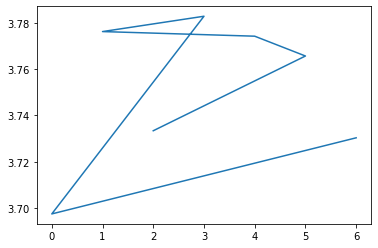

In [94]:
plt.plot(X, Y)

<BarContainer object of 7 artists>

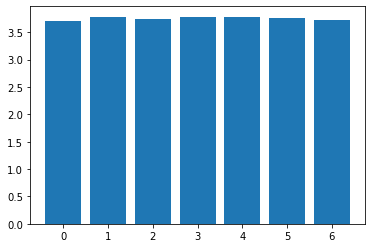

In [95]:
plt.bar(X, Y)

Let's zoom in to make the differences a bit more visible:

<BarContainer object of 7 artists>

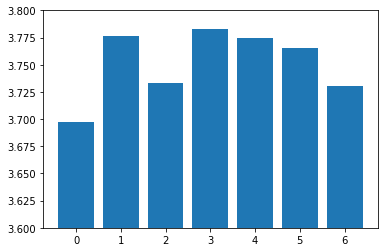

In [96]:
plt.ylim(3.6, 3.8)
plt.bar(X, Y)

Next let's add some labels:

<BarContainer object of 7 artists>

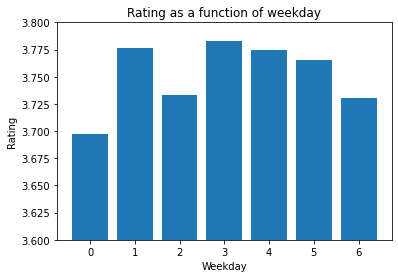

In [97]:
plt.ylim(3.6, 3.8)
plt.xlabel("Weekday")
plt.ylabel("Rating")
plt.title("Rating as a function of weekday")
plt.bar(X, Y)

Finally let's rename the ticks to correspond to the days of the week

<BarContainer object of 7 artists>

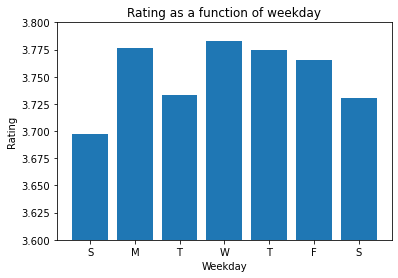

In [98]:
plt.ylim(3.6, 3.8)
plt.xlabel("Weekday")
plt.ylabel("Rating")
plt.xticks([0,1,2,3,4,5,6],['S', 'M', 'T', 'W', 'T', 'F', 'S'])
plt.title("Rating as a function of weekday")
plt.bar(X, Y)